In [1]:
# Importing The Data
import pandas as pd
MD_Agric_df = pd.read_csv('https://raw.githubusercontent.com/JackronyK/Python/main/Exam/Main%20Exam/MD_agric_exam-4313.csv')


In [8]:
MD_Agric_df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


In [3]:
MD_Agric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Field_ID           1000 non-null   int64  
 1   Elevation          1000 non-null   float64
 2   Rainfall           1000 non-null   float64
 3   Min_temperature_C  1000 non-null   float64
 4   Max_temperature_C  1000 non-null   float64
 5   pH                 1000 non-null   float64
 6   Pollution_level    1000 non-null   float64
 7   Plot_size          1000 non-null   float64
 8   Annual_yield       1000 non-null   float64
 9   Crop_type          1000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 78.2+ KB


Write code to determine the number of unique crop types in the dataset?

In [11]:
len(MD_Agric_df['Crop_type'].unique())

8

Identify the maximum annual yield for "wheat" crop type in the dataset (rounded to 2 decimal places).

In [18]:
MD_Agric_df[MD_Agric_df['Crop_type'] =='wheat']['Annual_yield'].round(2).max()

8.99

Find the total rainfall for crop types where the average pollution level is above 0.2

In [21]:
MD_Agric_df[MD_Agric_df['Pollution_level'] > 0.2]['Rainfall'].sum()

478902.6

In [25]:
crop_ave_pl = MD_Agric_df.groupby(by=['Crop_type'])['Pollution_level'].mean()

In [45]:
crops_ab_threshold = [crop for crop in crop_ave_pl[crop_ave_pl>0.2].index]
type(crops_ab_threshold)
crops_ab_threshold

['cassava', 'coffee', 'maize', 'potato', 'tea', 'wheat']

In [48]:
MD_Agric_df[MD_Agric_df['Crop_type'] in crops_ab_threshold ]['Rainfall'].sum()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [49]:
total_rainfall = MD_Agric_df[MD_Agric_df['Crop_type'].isin(crops_ab_threshold)]['Rainfall'].sum()
print("Total rainfall for selected crop types:", total_rainfall)

Total rainfall for selected crop types: 941959.7


In [50]:
#Find the total rainfall for crop types where the average pollution level is above 0.2.
filtered_data = MD_Agric_df.groupby("Crop_type").filter(lambda x: x["Pollution_level"].mean() > 0.2)
total_rainfall = filtered_data["Rainfall"].sum()

Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?

In [51]:
def temp_range(df,fieldID):
    #Filter the Data
    df= df[df['Field_ID'] == fieldID]
    return df['Max_temperature_C'] - df['Min_temperature_C']


In [56]:
temp_range(MD_Agric_df, 1458).values.astype(float)

array([40.7])

In [57]:
[temp_range(MD_Agric_df,ID).values for ID in [1458, 1895, 5443]]

[array([40.7]), array([35.7]), array([33.4])]

What does the following code achieve?

a = data['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = data[data['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

In [58]:
a = MD_Agric_df['Crop_type'].unique()

b = float('inf')

c = ''

for crop in a:

    d = MD_Agric_df[MD_Agric_df['Crop_type'] == crop]['Min_temperature_C'].mean()

    if d < b:

        b = d

        c = crop

print(c)

rice


In [59]:
MD_Agric_df[MD_Agric_df['Crop_type'] == crop]['Min_temperature_C'].mean()

-6.464583333333333

In [61]:
MD_Agric_df.groupby(by=['Crop_type'])['Min_temperature_C'].mean().sort_values()

Crop_type
rice      -6.464583
banana    -5.389320
wheat     -5.060656
potato    -4.570548
maize     -4.312195
coffee    -4.165657
cassava   -4.080142
tea       -2.885401
Name: Min_temperature_C, dtype: float64

Write code to calculate the total plot size for plots where the pH is less than 5.5.

In [4]:
MD_Agric_df[MD_Agric_df['pH']<5.5]['Plot_size'].sum().round(2)

1731.9

In [2]:
MD_Agric_df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava


Using Pandas, create a dataframe that includes entries with a 'Min_temperature_C’< -5 and a 'Max_temperature_C' > 30. How many rows are in the filtered dataset?

In [17]:
new_df = MD_Agric_df[(MD_Agric_df['Min_temperature_C'] < -5) & (MD_Agric_df['Max_temperature_C'] > 30)]

In [23]:
import pandas as pd
len(new_df)

319

Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).

In [28]:
import numpy as np
median_rainfall = MD_Agric_df['Plot_size'].median()
round(np.std(MD_Agric_df[MD_Agric_df['Plot_size'] > median_rainfall]['Rainfall']),2)

469.62

If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes

In [45]:
most_common_max_temp = MD_Agric_df['Max_temperature_C'].mode()

least_common_ct = MD_Agric_df['Crop_type'].value_counts().sort_values().index[0]

In [44]:
MD_Agric_df['Crop_type'].value_counts().sort_values().index[0]

'rice'

In [65]:
str(most_common_max_temp[0])[0:3] + least_common_ct[-3:]

'30.ice'

In [64]:
least_common_ct[-3:]

'ice'

Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?

In [72]:
def elevation_categorization(elev):
    if elev < 300:
        return "Low"
    elif 300 <= elev <= 600 :
        return "Medium"
    elif elev > 600:
        return "High"
    else:
        return "unknown"
MD_Agric_df['Elevation_Categ'] = MD_Agric_df['Elevation'].apply(elevation_categorization)


In [73]:
MD_Agric_df.head()

,Field_ID,Elevation,Rainfall,Min_temperature_C,Max_temperature_C,pH,Pollution_level,Plot_size,Annual_yield,Crop_type,Elevation_Categ
0,1162,494.95615,1507.6,-5.4,31.0,6.859436,0.007034,3.6,1.617421,coffee,Medium
1,5108,663.73390,581.0,-4.7,30.9,5.603219,0.289643,4.2,2.532497,potato,High
2,3504,396.87990,1715.1,-6.1,31.7,5.774116,0.000409,2.6,1.262207,banana,Medium
3,5351,594.80370,1748.0,-4.3,33.6,6.477415,0.088777,7.9,4.351564,wheat,Medium
4,905,609.49800,1395.8,-4.5,31.3,5.419586,0.050023,10.8,5.034791,cassava,High


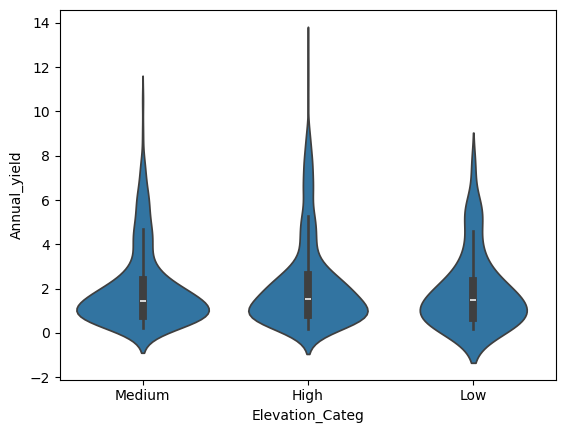

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plotting
sns.violinplot(data = MD_Agric_df, y = 'Annual_yield', x= 'Elevation_Categ')


plt.show()

Assuming each 'Crop_type' contributes an integer value equal to its length (e.g., 'wheat' contributes 5), write a recursive function to sum the integer values for each unique crop type in the dataset. What is the sum?

In [79]:
crop_len = 0
for crop in MD_Agric_df['Crop_type'].unique():
    
    crop_len += len(crop)
crop_len

42

Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places?

In [82]:
coffee_yield = MD_Agric_df[MD_Agric_df['Crop_type'] == "coffee"]['Annual_yield']
banana_yield = MD_Agric_df[MD_Agric_df['Crop_type'] == "banana"]['Annual_yield']

In [83]:
coffee_yield
banana_yield

2      1.262207
5      1.743458
26     0.818103
48     0.210254
55     1.226071
         ...   
911    1.038792
932    0.960322
966    5.111363
975    6.688300
981    1.693181
Name: Annual_yield, Length: 103, dtype: float64

In [84]:
import scipy as sp

In [ ]:
nc = len(coffee_yield)
nb = len(banana_yield)
sp.stats.ttest_ind

Let's perform a test. Suppose that we have samples { X
 } and { Y
 } with the following key statistics:

nX=40,nY=23,s2X=12.5,s2Y=20.
 
Then our test statistic is 0.625, and we compute a  p
 -value as follows:

st.f.cdf(12.5 / 20, dfn = 39, dfd = 22)

In [85]:
# Step 4: Perform the t-test
from scipy.stats import ttest_ind
t_test_result = ttest_ind(coffee_yield, banana_yield)

# Step 5: Get the p-value, rounded to three decimal places
p_value = round(t_test_result.pvalue, 3)

print(f"The p-value is: {p_value}")

The p-value is: 0.598
